# Bank Loan Modelling

In this project, we use the <b>Thera-Bank dataset</b> to develop a classifier that will help the bank to identify the potential customers who are more likely to purchase the loan.


The dataset contains both customer information and customer response to the last personal loan campaign:

<b>ID</b>: ID of the customer

<b>Age</b>: Age of the customer in completed years

<b>Experience</b>: Amount of work experience in years

<b>Income</b>: Amount of annual income (in thousands)

<b>Zipcode</b>: Postal code in which the client lives

<b>Family</b>: Number of family members

<b>CCAvg</b>: Average monthly spending with the credit card (in thousands)

<b>Education</b>: Education level (1: bachelor's degree, 2: master's degree, 3: advanced/professional degree)

<b>Mortgage</b>: Value of home mortgage, if any (in thousands)

<b>Securities Account</b>: Does the customer have a securities account with the bank?

<b>CD Account</b>: Does the customer have a certificate of deposit account (CD) with the bank?

<b>Online</b>: Does the customer use the internet banking facilities?

<b>CreditCard</b>: Does the customer use a credit card issued by the bank?

<b>Personal Loan</b>: Did this customer accept the personal loan offered in the last campaign? (Target Variable)

# Import Libraries


In [58]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
import warnings
%matplotlib inline

# Read Dataset

In [2]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name= 'Data')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Dataset Univariate Analysis

In [59]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.drop('ID', axis = 1, inplace = True)

# Noise Treatment

From the profile_report, we see that the following columns have noisy variables in it. So we remove it:Zip Code and Experience

We observe from the profile report that, ZIP Code = 9307 is a noisy variable, hence we drop it.
The drop=True argument in the reset_index method is used to specify that the old index should be dropped and a new index should be created.

In [5]:
df.drop(df[df['ZIP Code'] == 9307].index,inplace = True)
df.reset_index(drop = True, inplace = True)

In [6]:
#Similarly, we see that there are 3 values, that are less than 0.
df[df['Experience']<0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [7]:
##Since, the number of noise values are smaller in Experience column, instead of removing them, 
#we replace them with their absolute values.
df['Experience'] = df['Experience'].apply(abs)

# Outlier Treatment


From the profile report, we observed that only the column <b>Mortage</b> has a Kurtosis above 3. If the Kurtosis value is above 3, it is likely to contain outliers.

In [8]:
#We use Z-score to find out those values above 3.
df[stats.zscore(df['Mortgage'])> 3]['Mortgage'].count()

105

We found 105 records with Z-score more than 3. Hence, we treat it as outliers and drop them from our dataset

In [9]:
outlier_rec = df[stats.zscore(df['Mortgage'])> 3].index
df.drop(outlier_rec, inplace = True)
df.reset_index(drop = True, inplace = True)

<b> Define Features <b>

In [10]:
X = df.drop('Personal Loan', axis = 1)
y = df['Personal Loan']

# Logistic Regression

In [11]:
#Split the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 0)

In [12]:
#Scale the data using Standard Scalar
std_scalar = StandardScaler()
X_trained = std_scalar.fit_transform(X_train)
X_tested = std_scalar.fit_transform(X_test)

X_train = pd.DataFrame(X_trained, columns = X_train.columns)
X_test = pd.DataFrame(X_tested, columns= X_test.columns)

We will now perform hyperparameter tuning to optimize the performance of the model. We will use <b>GridSearchCV</b>

In [52]:
# initialize logistic regression model
logreg = LogisticRegression()

# specify the hyperparameters and their respective values to be searched in the grid
param_grid1 = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'sag', 'newton-cg', 'saga'],
    'max_iter': [100, 1000, 10000] }

# initialize the grid search cross-validation object
grid_search1 = GridSearchCV(logreg, param_grid1, cv=5, scoring = 'f1')

# fit the grid search to the data
grid_search1.fit(X_train, y_train)










C:\Users\shash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shash\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\shash\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shash\Anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'newton-cg', 'saga']},
             scoring='f1')

In [53]:
print("Best parameters: ", grid_search1.best_params_)
print("Best score: ", grid_search1.best_score_)


Best parameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score:  0.7126802753680225


In [15]:
# use the best hyperparameters to initialize the logistic regression model
logreg = LogisticRegression(C =1,class_weight =None,max_iter=100,penalty ='l2',solver='lbfgs')

In [16]:
logreg.fit(X_train,y_train)
pred_y = logreg.predict(X_test)


<b>Feature Importance</b>

<AxesSubplot:xlabel='importance', ylabel='feature'>

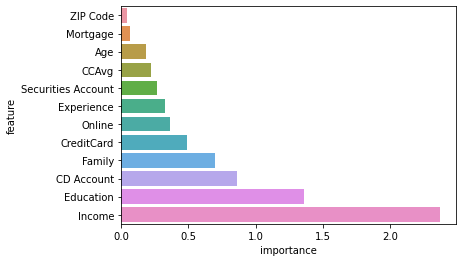

In [17]:
importances = np.abs(logreg.coef_[0])
# get the indices of the sorted importances
sorted_indices = np.argsort(importances)

# sort the feature names based on the sorted importances
sorted_features = X.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

# create a dataframe with the sorted feature importances
feature_importance_df = pd.DataFrame({'feature':sorted_features, 'importance':sorted_importances})

# plot the feature importances
sns.barplot(y='feature',x='importance', data = feature_importance_df)

<b>ROC Curve and AUC Value<b/>

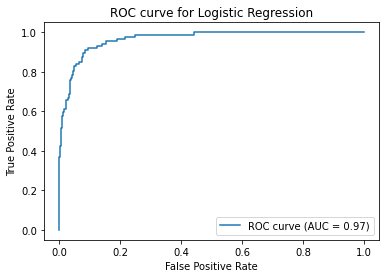

In [18]:
from sklearn.metrics import roc_curve, auc
# make predictions for the test set
y_pred_proba = logreg.predict_proba(X_test)[:,1]

# calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# calculate the AUC
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

<b>Classification Report </b>

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test,pred_y))
#Save the results of logistic regression
logreg_result = metrics.classification_report(y_test,pred_y)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       892
           1       0.77      0.61      0.68        87

    accuracy                           0.95       979
   macro avg       0.87      0.80      0.83       979
weighted avg       0.95      0.95      0.95       979



# KNN 

Hypermater tuning using <b>GridSearchCV</b>

In [20]:
#Initialize the KNN model
knn = KNeighborsClassifier()

#Initialize the hypermaters
param_grid2 = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# initialize the grid search cross-validation object
grid_search2 = GridSearchCV(knn, param_grid2, cv=5,scoring ='f1')


# fit the grid search to the data
grid_search2.fit(X_train, y_train)


print("Best parameters: ", grid_search2.best_params_)
print("Best score: ", grid_search2.best_score_)

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best score:  0.7151969575369501


In [21]:
# use the best hyperparameters to initialize the KNN model
knn = KNeighborsClassifier(metric='euclidean',n_neighbors =3,weights = 'distance')

In [22]:
#Train the model
knn.fit(X_train,y_train)
knnpred_y = knn.predict(X_test)

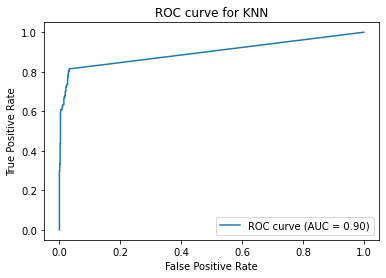

In [23]:
# make predictions for the test set
y_pred_proba = knn.predict_proba(X_test)[:,1]

# calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# calculate the AUC
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN')
plt.legend(loc="lower right")
plt.show()

In [24]:
#Classification report for KNN Model
knn_result =print(metrics.classification_report(y_test,knnpred_y))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       892
           1       0.94      0.59      0.72        87

    accuracy                           0.96       979
   macro avg       0.95      0.79      0.85       979
weighted avg       0.96      0.96      0.96       979



# Decision Tree

Hyperparameter tuning using <b>GridSearchCV<b>

In [25]:
#Initialize the Decision Tree model
dt = DecisionTreeClassifier()

#Initialize the hypermaters
param_grid3 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# initialize the grid search cross-validation object
grid_search3 = GridSearchCV(dt, param_grid3, cv=5, scoring = 'f1')


# fit the grid search to the data
grid_search3.fit(X_train, y_train)



print("Best parameters: ", grid_search3.best_params_)
print("Best score: ", grid_search3.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score:  0.9173649315841444


In [26]:
# use the best hyperparameters to initialize the KNN model
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,min_samples_leaf = 2, min_samples_split = 5)
    
#Train the model
dt.fit(X_train,y_train)
dtpred_y = dt.predict(X_test)


In [27]:
# Calculate feature importances
importances = dt.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Print the feature importances
print("Feature importances:")
for i in sorted_idx:
    print("{}: {}".format(X.columns[i], importances[i]))

Feature importances:
Income: 0.5710013345658002
Education: 0.18250583684137195
Family: 0.1164777173984017
CCAvg: 0.1150854200277437
CD Account: 0.012471083524423396
Experience: 0.00245860764225914
CreditCard: 0.0
Online: 0.0
Securities Account: 0.0
Mortgage: 0.0
ZIP Code: 0.0
Age: 0.0


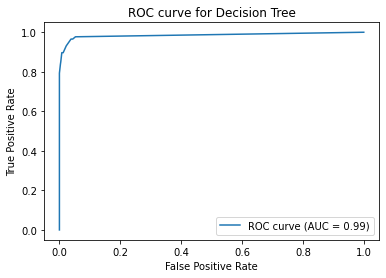

In [28]:
# make predictions for the test set
y_pred_proba = dt.predict_proba(X_test)[:,1]

# calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# calculate the AUC
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [29]:
#Classification report for KNN Model
dt_result =print(metrics.classification_report(y_test,dtpred_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       892
           1       0.88      0.90      0.89        87

    accuracy                           0.98       979
   macro avg       0.93      0.94      0.94       979
weighted avg       0.98      0.98      0.98       979



# Random Forest


Hyperparameter tuning using <b>GridSearchCV</b>

In [30]:
#Initialize the Random Forest model
rf = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid4 = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# initialize the grid search cross-validation object
grid_search4 = GridSearchCV(rf, param_grid4, cv=5,scoring = 'f1')


# fit the grid search to the data
grid_search4.fit(X_train, y_train)


print("Best parameters: ", grid_search4.best_params_)
print("Best score: ", grid_search4.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 50}
Best score:  0.9268515081580944


In [31]:
# use the best hyperparameters to initialize the Random Forest model
rf = RandomForestClassifier(criterion = 'gini',max_depth = 10,max_features ='sqrt',n_estimators = 100)
    
#Train the model
rf.fit(X_train,y_train)
rfpred_y = rf.predict(X_test)

In [32]:
# Calculate feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Print the feature importances
print("Feature importances:")
for i in sorted_idx:
    print("{}: {}".format(X.columns[i], importances[i]))

Feature importances:
Income: 0.36405203794682706
Education: 0.16765657316711682
CCAvg: 0.16644018228792018
Family: 0.10969516728615442
CD Account: 0.05623528098544852
ZIP Code: 0.03517153562539374
Age: 0.03359046835666442
Experience: 0.030622638812260614
Mortgage: 0.018292154025247472
Online: 0.007109631379965025
CreditCard: 0.0069450568468842535
Securities Account: 0.004189273280117497


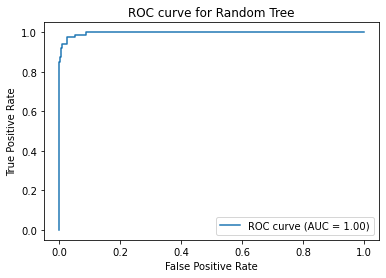

In [33]:
# make predictions for the test set
y_pred_proba = rf.predict_proba(X_test)[:,1]

# calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# calculate the AUC
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Tree')
plt.legend(loc="lower right")
plt.show()

In [34]:
#Classification report for KNN Model
rf_result =print(metrics.classification_report(y_test,rfpred_y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.97      0.87      0.92        87

    accuracy                           0.99       979
   macro avg       0.98      0.94      0.96       979
weighted avg       0.99      0.99      0.99       979



# XGBoost

Hyperparameter using <b>GridSearchCV</b>

In [35]:
import xgboost as xgb

# Define the parameter grid to search
param_grid5 = {'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}


#Initialize the XGBoost model
xgb = XGBClassifier()


# Create the GridSearchCV object
grid_search5 = GridSearchCV(xgb, param_grid5, cv=3,scoring = 'f1')

# fit the grid search to the data
grid_search5.fit(X_train, y_train)






GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [36]:
print("Best parameters: ", grid_search5.best_params_)
print("Best score: ", grid_search5.best_score_)


Best parameters:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
Best score:  0.9272693083265772


In [44]:
# use the best hyperparameters to initialize the Random Forest model
xgb = XGBClassifier(max_depth = 5,n_estimators = 200, learning_rate = 0.3)

xgb.fit(X_train,y_train)

#Train the modelxgb.fit(X_train,y_train)
xgbpred_y = xgb.predict(X_test)

In [45]:
# Calculate feature importances
importances = xgb.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Print the feature importances
print("Feature importances:")
for i in sorted_idx:
    print("{}: {}".format(X.columns[i], importances[i]))

Feature importances:
Education: 0.41752544045448303
Income: 0.18743197619915009
Family: 0.16202783584594727
CD Account: 0.08004090189933777
CCAvg: 0.057906460016965866
Age: 0.02052748203277588
Experience: 0.0161418654024601
Mortgage: 0.015945104882121086
ZIP Code: 0.01223080325871706
CreditCard: 0.012060795910656452
Securities Account: 0.009627852588891983
Online: 0.008533477783203125


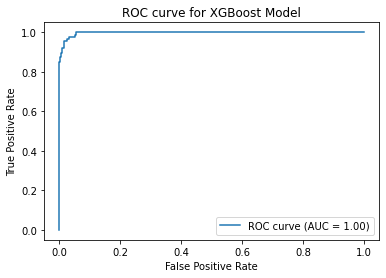

In [46]:
# make predictions for the test set
y_pred_proba = xgb.predict_proba(X_test)[:,1]

# calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# calculate the AUC
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for XGBoost Model')
plt.legend(loc="lower right")
plt.show()

In [47]:
#Classification report for XGBoost Model
xgb_result =print(metrics.classification_report(y_test,xgbpred_y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.95      0.89      0.92        87

    accuracy                           0.99       979
   macro avg       0.97      0.94      0.95       979
weighted avg       0.99      0.99      0.99       979



# Conculusion

Amongst all the tested classifier, 'XGBoost' had the best performance in identifying potential loan customers with an F-1 score of <b>92%</b>.

According to prior feature importances obtained for each model , <b>Education, Income, Family, CCAvg, and CD Account</b> are the most crucial factors in determining potential loan borrowers.